# Setup

In [1]:
import sys
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

In [2]:
def version() :
    print('Python version : ', sys.version)
    print('TensorFlow version : ', tf.__version__)
    print('Keras version : ', keras.__version__)

version()    

Python version :  3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0]
TensorFlow version :  2.4.1
Keras version :  2.4.0


# Prepare Data

In [3]:
# Global variables
img_rows = 28
img_cols = 28
num_classes = 10
input_shape = (img_rows, img_cols, 1)

# x_train shape: (60000, 28, 28, 1)
# y_train shape: (60000)
# y : 5 > [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
def load_mnist() :
    # Model / data parameters
    # the data, split between train and test sets
    # x_train shape: (60000, 28, 28)
    # y_train shape: (60000,)  0~9
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


    # Make sure images have shape (28, 28, 1)
    # x_train shape: (60000, 28, 28, 1)
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    # 5 > [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_mnist()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


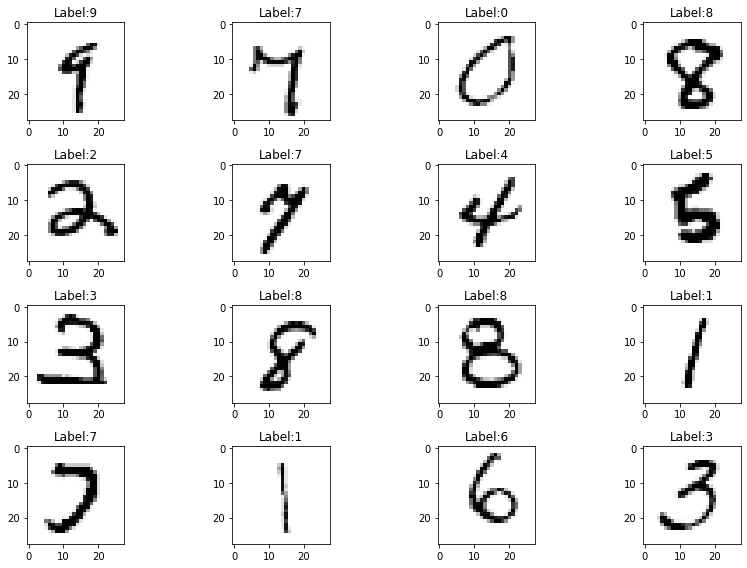

In [4]:
def show_mnist(x_train, y_train, size, y_predict=None):

    samples = np.random.randint(len(x_train), size=size)
    
    count = 0
    nrows = ncols = 4

    plt.figure(figsize=(12,8))


    for n in samples:
        count += 1
        plt.subplot(nrows, ncols, count)
        plt.imshow(x_train[n].reshape(img_rows, img_cols), cmap='Greys', interpolation='nearest')
        tmp = "Label:" + str(np.argmax(y_train[n]))                             
        if y_predict is not None:
            tmp = tmp + ", Prediction:" + str(np.argmax(y_predict[n]))               
        plt.title(tmp)

    plt.tight_layout()
    plt.show()

    
show_mnist(x_train, y_train, size=16)

In [38]:
def colored(b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(0, 0, b, text)

def print_mnist(xt):
    txt = ""
    for i in range (0, 27):
       for j in range(0, 27):
          val = "%.1f" % xt[i,j]
          #val = colored(xt[i,j]*255, str(val).replace("[", "").replace("]", ""))
          #txt += val
          txt += str(val).replace("[", "").replace("]", "") + ", "
          
       print(txt)
       txt = ""

print_mnist(x_train[0,:])        

0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.7, 0.1, 0.7, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.6, 0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.7, 1.0, 0.9, 0.8, 0.3, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.9, 1.0

# Build Model

In [5]:
def build_model() :
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    return model;

def show_model(model) :
    model.summary()
    
model = build_model()
show_model(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Train the model

In [6]:
def train_model(model, x_train, y_train) :
    batch_size = 128
    epochs = 5

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    return history

#history = train_model(model, x_train, y_train)

Epoch 1/5
422/422 [==============================] - 13s 30ms/step - loss: 0.7341 - accuracy: 0.7772 - val_loss: 0.0826 - val_accuracy: 0.9798
Epoch 2/5
422/422 [==============================] - 12s 29ms/step - loss: 0.1228 - accuracy: 0.9627 - val_loss: 0.0601 - val_accuracy: 0.9828
Epoch 3/5
422/422 [==============================] - 13s 30ms/step - loss: 0.0906 - accuracy: 0.9717 - val_loss: 0.0485 - val_accuracy: 0.9878
Epoch 4/5
422/422 [==============================] - 12s 30ms/step - loss: 0.0751 - accuracy: 0.9777 - val_loss: 0.0415 - val_accuracy: 0.9887
Epoch 5/5
422/422 [==============================] - 12s 29ms/step - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0436 - val_accuracy: 0.9867


In [47]:
import mlflow

def trainmf_model(model, x_train, y_train):    
    mlflow.tensorflow.autolog(every_n_iter=1)

    with mlflow.start_run(run_name='mnist-run-2') as run:

        # train model
        history = train_model(model, x_train, y_train)

        print("Logged data and model in run {}".format(run.info.run_id))
        
        # Get trained model
        model_uri = mlflow.get_artifact_uri("model")
        
    return history, model_uri

def evalutemf_model(model_uri, x_test, y_test):     
    import mlflow.keras
    keras_model = mlflow.keras.load_model(model_uri)
    loss, acc = keras_model.evaluate(x_test, y_test, verbose=False)
    print(f"Model Evaluation Results:- loss: {loss:.4f} Acc: {acc:.4f}")     
 

history, model_uri = trainmf_model(model, x_train, y_train)
evalutemf_model(model_uri, x_test, y_test)

Epoch 1/5
422/422 [==============================] - 13s 30ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0305 - val_accuracy: 0.9927
Epoch 2/5
422/422 [==============================] - 11s 27ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0307 - val_accuracy: 0.9927
Epoch 3/5
422/422 [==============================] - 11s 27ms/step - loss: 0.0214 - accuracy: 0.9925 - val_loss: 0.0274 - val_accuracy: 0.9935
Epoch 4/5
422/422 [==============================] - 12s 28ms/step - loss: 0.0214 - accuracy: 0.9925 - val_loss: 0.0288 - val_accuracy: 0.9927
Epoch 5/5
422/422 [==============================] - 12s 28ms/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 0.0289 - val_accuracy: 0.9930
INFO:tensorflow:Assets written to: /tmp/tmph7fmjvnr/model/data/model/assets
Logged data and model in run ce0a8a2e77844e4a93583798fe653a4d
Model Evaluation Results:- loss: 0.0249 Acc: 0.9926


# Visualize Model History

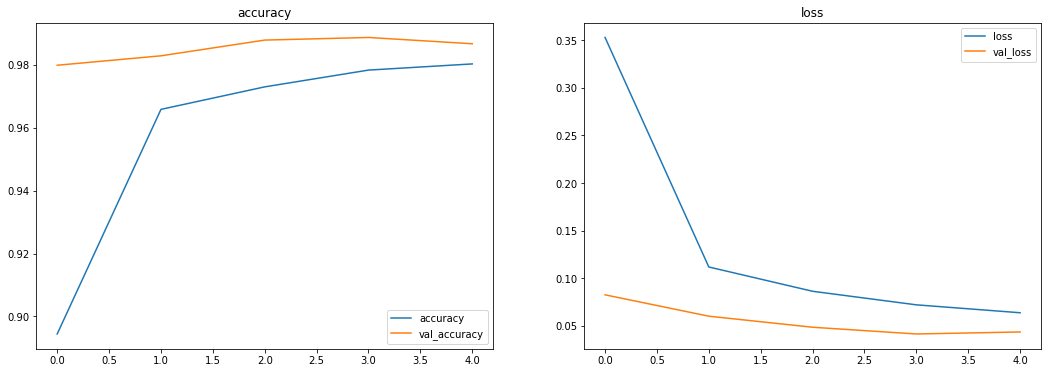

In [7]:
def show_history(history) :
    plt.figure(figsize=(18, 6))

    # 에포크별 정확도
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.title("accuracy")
    plt.legend()

    # 에포크별 손실률
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title("loss")
    plt.legend()

    plt.show()
 
show_history(history)

# Evaluate the trained model

In [8]:
def evaluate_model(model, x_test, y_test): 
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print(score)
    return score
    
score = evaluate_model(model, x_test, y_test)    

Test loss: 0.0427391417324543
Test accuracy: 0.9848999977111816
[0.0427391417324543, 0.9848999977111816]


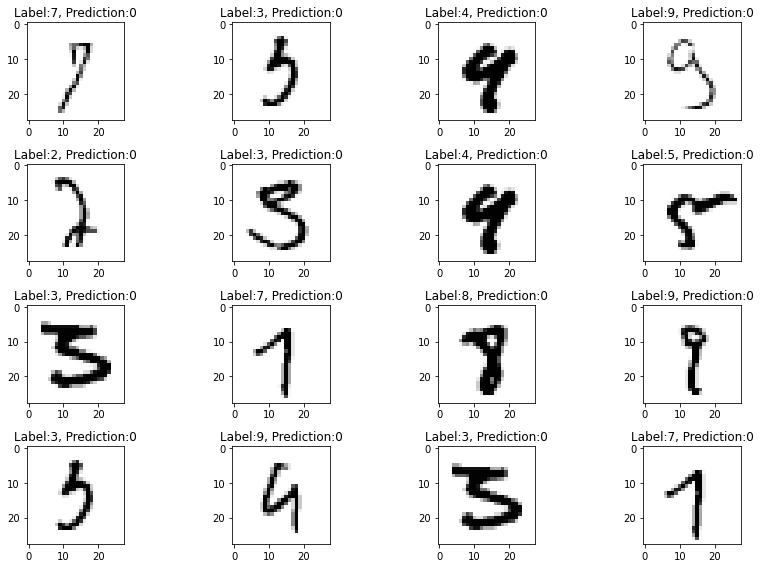

In [9]:
def show_false(model, x_test, y_test) :
    import random
    predicted_result = model.predict(x_test)
    predicted_labels = np.argmax(predicted_result, axis=1)

    test_labels = np.argmax(y_test, axis=1)

    false_result = []

    for n in range(0, len(test_labels)):
        if predicted_labels[n] != test_labels[n]:
            false_result.append(n)

    samples = random.choices(population=false_result, k=32)
    x_false = np.array(x_test)[samples]
    y_false = np.array(y_test)[samples]
    y_predict = np.array(test_labels)[samples]

    show_mnist(x_false, y_false, 16, y_predict=y_predict)

show_false(model, x_test, y_test)   

# Save model

In [10]:
model.save("./mnist.h5")

# load model

In [11]:
model2 = keras.models.load_model("./mnist.h5")
# when error occured : AttributeError: 'str' object has no attribute 'decode'
# pip install 'h5py<3.0.0'

# main

#################################################################
Environment
#################################################################
Python version :  3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0]
TensorFlow version :  2.4.1
Keras version :  2.4.0
#################################################################
Load mnist data
#################################################################
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


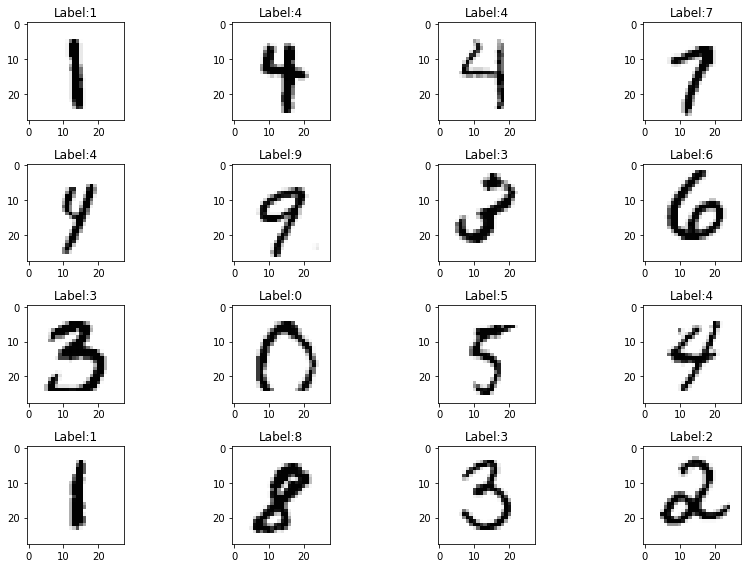

#################################################################
Build mnist model
#################################################################
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 

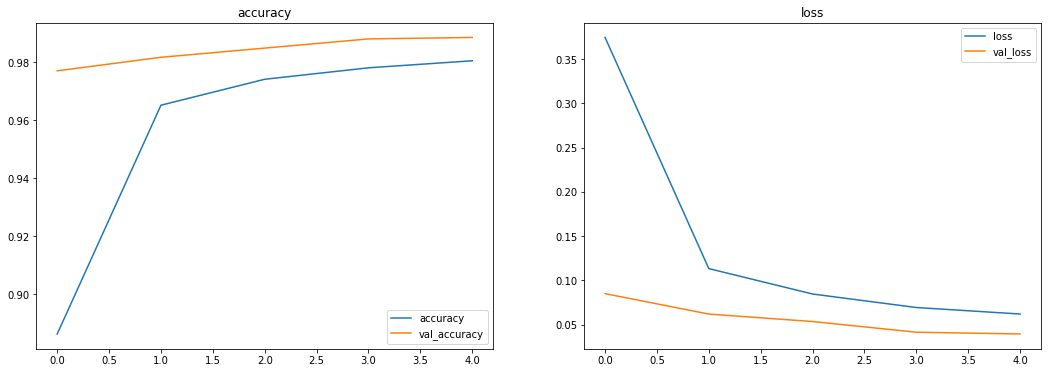

#################################################################
Evaluate mnist modelwith Test Data
#################################################################
Test loss: 0.03575378656387329
Test accuracy: 0.9873999953269958
[0.03575378656387329, 0.9873999953269958]


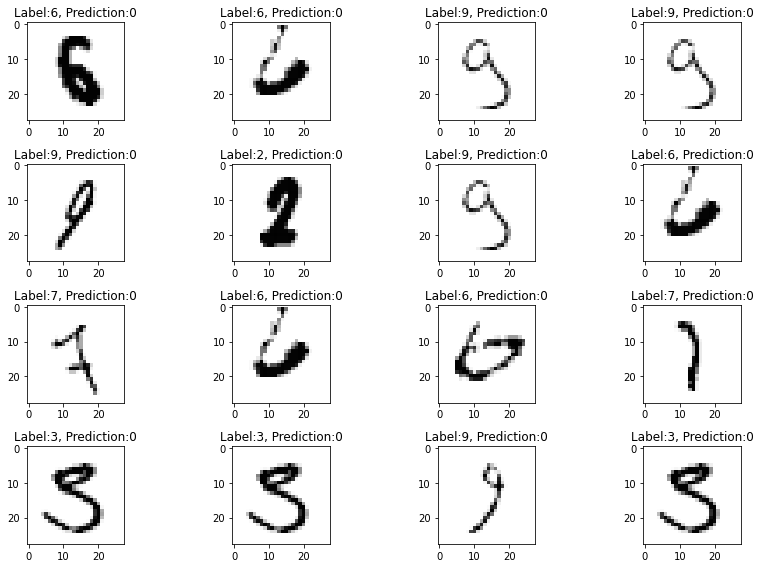

In [12]:
def headline(title):
    print("#"*65)
    print(title)
    print("#"*65)
    
def main() :
    headline("Environment")
    version()    

    headline("Load mnist data")
    (x_train, y_train), (x_test, y_test) = load_mnist(); 
    show_mnist(x_train, y_train, size=16)

    headline("Build mnist model")
    model = build_model(); 
    show_model(model)

    headline("Train mnist modelwith Train Data")
    history = train_model(model, x_train, y_train); 
    show_history(history)

    headline("Evaluate mnist modelwith Test Data")
    score = evaluate_model(model, x_test, y_test)
    show_false(model, x_test, y_test)

main()

# Reference
- https://keras.io/examples/vision/mnist_convnet/